In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
import seaborn as sns

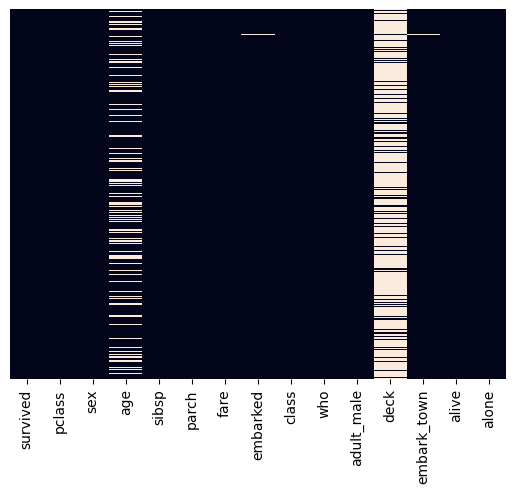

In [6]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False)
plt.show()

<AxesSubplot:xlabel='survived', ylabel='count'>

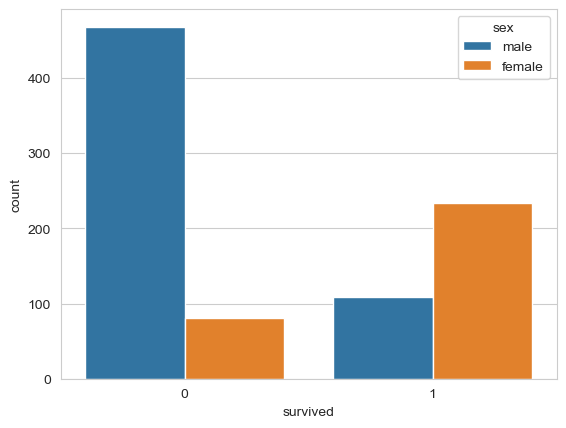

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

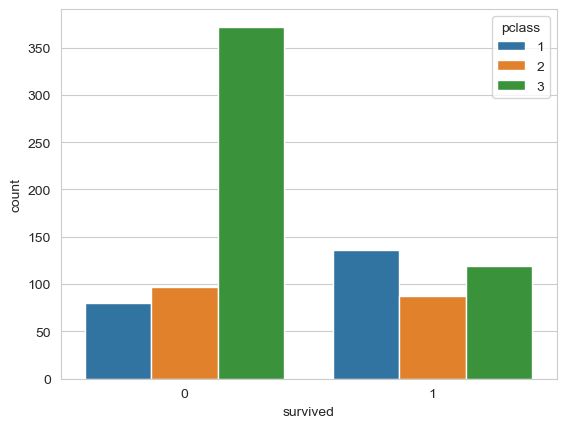

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

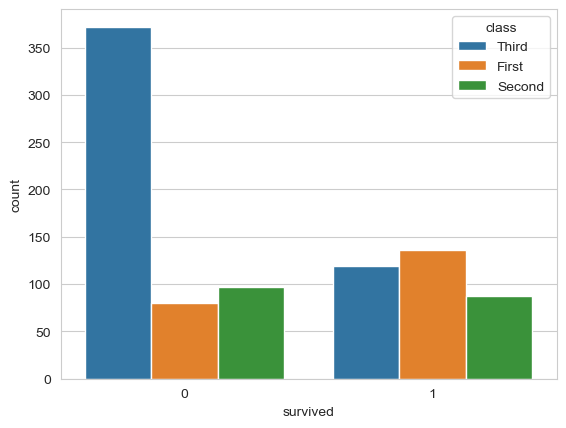

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='class',data=df)

C:\Users\Arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

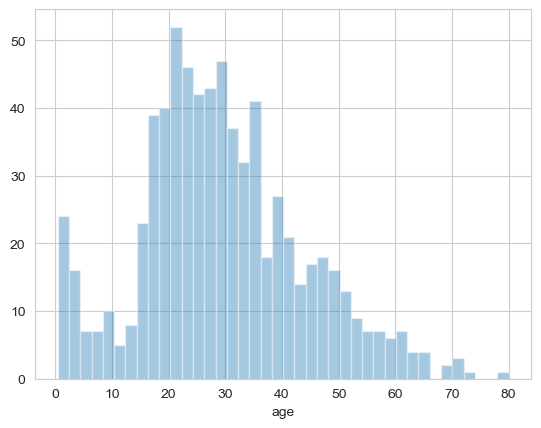

In [10]:
sns.distplot(df['age'].dropna(),kde=False,bins=40)

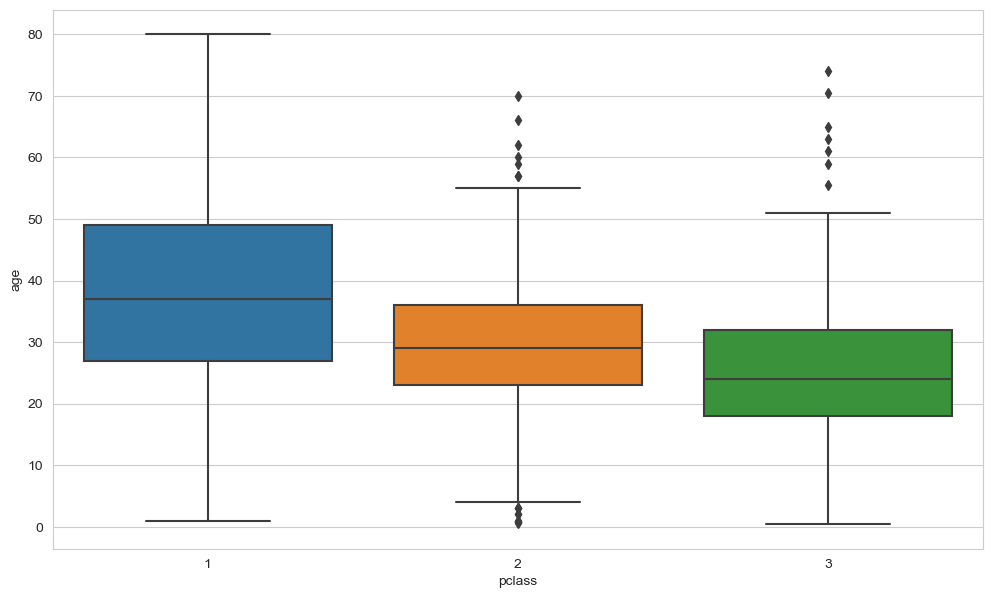

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=df)
plt.show()

In [12]:
def apply_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [13]:
df['age'] = df[['age','pclass']].apply(apply_age,axis=1)

In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.drop(['embarked','deck','embark_town'],axis='columns',inplace=True)

In [16]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [17]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,24.0,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,First,man,True,yes,True


In [18]:
df.drop(['sibsp','class','who','adult_male','alive','alone','parch'],axis='columns',inplace=True)

In [19]:
df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,24.0,23.4500
889,1,1,male,26.0,30.0000


In [20]:
# Quantile method will give the percentile value !! #

In [21]:
df['age'].quantile(0.95)

54.0

In [22]:
max_threshold = df['age'].quantile(0.95)
max_threshold

54.0

In [23]:
df[df['age']>max_threshold]

,survived,pclass,sex,age,fare
11,1,1,female,58.0,26.5500
15,1,2,female,55.0,16.0000
33,0,2,male,66.0,10.5000
54,0,1,male,65.0,61.9792
94,0,3,male,59.0,7.2500
96,0,1,male,71.0,34.6542
116,0,3,male,70.5,7.7500
152,0,3,male,55.5,8.0500
170,0,1,male,61.0,33.5000
174,0,1,male,56.0,30.6958


In [24]:
min_threshold = df['age'].quantile(0.05)
df[df['age']<min_threshold]

,survived,pclass,sex,age,fare
7,0,3,male,2.00,21.0750
10,1,3,female,4.00,16.7000
16,0,3,male,2.00,29.1250
43,1,2,female,3.00,41.5792
58,1,2,female,5.00,27.7500
63,0,3,male,4.00,27.9000
78,1,2,male,0.83,29.0000
119,0,3,female,2.00,31.2750
164,0,3,male,1.00,39.6875
171,0,3,male,4.00,29.1250


In [25]:
## To remove outliers ##

In [26]:
df1 = df[(df['age']<max_threshold) & (df['age']>min_threshold)]

In [27]:
df1.shape

(794, 5)

In [28]:
# I want seperate out the survived columns with other inputs #
target = df['survived']
inputs = df.drop('survived',axis='columns')

In [29]:
inputs.head()

,pclass,sex,age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [31]:
dummies = pd.get_dummies(inputs.sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
# We will append the dummies into the inputs #
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,pclass,sex,age,fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [33]:
inputs.drop('sex',axis=1,inplace=True)
inputs.head()

,pclass,age,fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train , X_test , y_train , y_test = train_test_split(inputs,target,test_size = 0.20)

In [36]:
len(X_train)

712

In [37]:
len(y_test)

179

In [38]:
len(X_test)

179

In [40]:
len(y_train)

712